# Final Project

### Part 0: Preparing the Data

In [2]:
#having issues with numpy (and jupyter notebook) so have to use the following 3 lines for now...
import sys
sys.path.insert(0,'/opt/anaconda3/lib/python3.9/site-packages')
print(sys.path)

# edit
#import statements
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

['/opt/anaconda3/lib/python3.9/site-packages', '/Users/nalic/Documents/GitHub/ML-Stellar_Classification', '/Users/nalic/anaconda3/lib/python310.zip', '/Users/nalic/anaconda3/lib/python3.10', '/Users/nalic/anaconda3/lib/python3.10/lib-dynload', '', '/Users/nalic/anaconda3/lib/python3.10/site-packages', '/Users/nalic/anaconda3/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-10.9-x86_64.egg', '/Users/nalic/anaconda3/lib/python3.10/site-packages/aeosa', '/Users/nalic/anaconda3/lib/python3.10/site-packages/mpmath-1.2.1-py3.10.egg', '/Users/nalic/anaconda3/lib/python3.10/site-packages/pycurl-7.45.1-py3.10-macosx-10.9-x86_64.egg']


In [3]:
#read in the dataset
path = "star_classification.csv"
raw_data = pd.read_csv(path)

#raw_data

raw_data[:12]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
# convert string labels into numbers: galaxy=0, qso=1, star=2
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

num_df = Encoder(raw_data)
num_df[:12]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,1,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,2,-0.000008,2444,54082,232


In [5]:
# convert into two datasets: features, X (everything excluding "class" column), and labels, y (just the "class" column)
#first convert pd dataframe to np array bc I know how to work with that better
arr = num_df.to_numpy()
type(arr)

#arr[0:3]
labels = arr[:,13]

features = np.delete(arr, 13, axis=1)
features = np.delete(arr, [0,1,2,8,9,10,11,12,13,15,16,17], axis=1)
print(features)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=40)
#define training data
#we'll select 70% of the data for this; we can just use the first .7 * 100,000 = 70,000 since they're not in any order

[[23.87882   22.2753    20.39501   19.16573   18.79371    0.6347936]
 [24.77759   22.83188   22.58444   21.16812   21.61427    0.779136 ]
 [25.26307   22.66389   20.60976   19.34857   18.94827    0.6441945]
 ...
 [21.16916   19.26997   18.20428   17.69034   17.35221    0.1433656]
 [25.35039   21.63757   19.91386   19.07254   18.62482    0.4550396]
 [22.62171   21.79745   20.60115   20.00959   19.28075    0.5429442]]


### Part 1: Logistic Regression

In [9]:
#fit the models (35 of them) according to the given training data. We will try all 4 of the solvers that are 
#compatible with the multinomial case; for each solver, we will vary the penalty and the strength of the penalty 
#("C"). (Note not all penalties are compatible with each solver).

#models with lbfgs solver
clf10 = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf121 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf122 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf123 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf124 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf125 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)

#models with newton-cg solver
clf20 = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf221 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf222 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf223 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf224 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf225 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)

#models with sag solver
clf30 = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf321 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf322 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf323 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf324 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf325 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='sag', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)

#models with saga solver
clf40 = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf411 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf412 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf413 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf414 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf415 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf421 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf422 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf423 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf424 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf425 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y_train)
clf431 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5).fit(X_train, y_train)
clf432 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=10, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5).fit(X_train, y_train)
clf433 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5).fit(X_train, y_train)
clf434 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5).fit(X_train, y_train)
clf435 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='saga', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5).fit(X_train, y_train)

###Predict class labels for samples in X
#testdata_features = features[70000:, :]
###I think the below definition is incorrect (trying to get rows 70,000 to 100,000 of the labels column)
#testdata_labels = features[:, 70000:]
#clf.predict(testdata_features)


/Users/nalic/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nalic/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [13]:
y_pred10 = clf10.predict(X_test)
y_pred121 = clf121.predict(X_test) 
y_pred122 = clf122.predict(X_test) 
y_pred123 = clf123.predict(X_test)
y_pred124 = clf124.predict(X_test)
y_pred125 = clf125.predict(X_test) 

#models with newton-cg solver
y_pred20 = clf20.predict(X_test) 
y_pred221 = clf221.predict(X_test) 
y_pred222 = clf222.predict(X_test) 
y_pred223 = clf223.predict(X_test)  
y_pred224 = clf224.predict(X_test)  
y_pred225 = clf225.predict(X_test)

#models with sag solver
y_pred30 = clf30.predict(X_test) 
y_pred321 = clf321.predict(X_test)
y_pred322 = clf322.predict(X_test) 
y_pred323 = clf323.predict(X_test) 
y_pred324 = clf324.predict(X_test) 
y_pred325 = clf325.predict(X_test)

#models with saga solver
y_pred40 = clf40.predict(X_test) 
y_pred411 = clf411.predict(X_test) 
y_pred412 = clf412.predict(X_test) 
y_pred413 = clf413.predict(X_test) 
y_pred414 = clf414.predict(X_test) 
y_pred415 = clf415.predict(X_test)
y_pred421 = clf421.predict(X_test) 
y_pred422 = clf422.predict(X_test) 
y_pred423 = clf423.predict(X_test) 
y_pred424 = clf424.predict(X_test) 
y_pred425 = clf425.predict(X_test) 
y_pred431 = clf431.predict(X_test) 
y_pred432 = clf432.predict(X_test) 
y_pred433 = clf433.predict(X_test) 
y_pred434 = clf434.predict(X_test) 
y_pred435 = clf435.predict(X_test)


f11=sklearn.metrics.f1_score(y_test, y_pred10, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f12=sklearn.metrics.f1_score(y_test, y_pred121, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f13=sklearn.metrics.f1_score(y_test, y_pred122, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f14=sklearn.metrics.f1_score(y_test, y_pred123, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f15=sklearn.metrics.f1_score(y_test, y_pred124, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f16=sklearn.metrics.f1_score(y_test, y_pred125, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f17=sklearn.metrics.f1_score(y_test, y_pred20, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f18=sklearn.metrics.f1_score(y_test, y_pred221, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f19=sklearn.metrics.f1_score(y_test, y_pred222, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f110=sklearn.metrics.f1_score(y_test, y_pred223, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f111=sklearn.metrics.f1_score(y_test, y_pred224, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f112=sklearn.metrics.f1_score(y_test, y_pred225, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f113=sklearn.metrics.f1_score(y_test, y_pred30, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f114=sklearn.metrics.f1_score(y_test, y_pred321, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f115=sklearn.metrics.f1_score(y_test, y_pred322, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f116=sklearn.metrics.f1_score(y_test, y_pred323, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f117=sklearn.metrics.f1_score(y_test, y_pred324, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f118=sklearn.metrics.f1_score(y_test, y_pred325, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f119=sklearn.metrics.f1_score(y_test, y_pred40, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f120=sklearn.metrics.f1_score(y_test, y_pred411, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f121=sklearn.metrics.f1_score(y_test, y_pred412, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f122=sklearn.metrics.f1_score(y_test, y_pred413, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f123=sklearn.metrics.f1_score(y_test, y_pred414, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f124=sklearn.metrics.f1_score(y_test, y_pred415, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f125=sklearn.metrics.f1_score(y_test, y_pred421, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f126=sklearn.metrics.f1_score(y_test, y_pred422, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f127=sklearn.metrics.f1_score(y_test, y_pred423, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f128=sklearn.metrics.f1_score(y_test, y_pred424, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f129=sklearn.metrics.f1_score(y_test, y_pred425, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f130=sklearn.metrics.f1_score(y_test, y_pred431, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f131=sklearn.metrics.f1_score(y_test, y_pred432, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f132=sklearn.metrics.f1_score(y_test, y_pred433, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f133=sklearn.metrics.f1_score(y_test, y_pred434, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
f134=sklearn.metrics.f1_score(y_test, y_pred435, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

print(f11)
print(f12)
print(f13)
print(f14)
print(f15)
print(f16)
print(f17)
print(f18)
print(f19)
print(f110)
print(f111)
print(f112)
print(f113)
print(f114)
print(f115)
print(f116)
print(f117)
print(f118)
print(f119)
print(f120)
print(f121)
print(f122)
print(f123)
print(f124)
print(f125)
print(f126)
print(f127)
print(f128)
print(f129)
print(f130)
print(f131)
print(f132)
print(f133)
print(f134)


0.9340025492570628
0.93708032312739
0.9399381767488727
0.9377403383729211
0.9269294406347913
0.9023131410166206
0.952232361832623
0.9526157830692933
0.95198809700724
0.9472865676871779
0.940868105813759
0.9035046931856399
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423
0.24927826589032423


In [19]:
#Return the mean accuracies of the different models on the given test data and labels.    **this is training not test
print("Accuracies of the lbfgs solvers: ")
print(clf10.score(X_test, y_test))
print(clf121.score(X_test, y_test))
print(clf122.score(X_test, y_test))
print(clf123.score(X_test, y_test))
print(clf124.score(X_test, y_test))
print(clf125.score(X_test, y_test))
print("\n")

print("Accuracies of the Newton-cg solvers: ")
print(clf20.score(X_test, y_test))
print(clf221.score(X_test, y_test))
print(clf222.score(X_test, y_test))
print(clf223.score(X_test, y_test))
print(clf224.score(X_test, y_test))
print(clf225.score(X_test, y_test))
print("\n")

print("Accuracies of the sag solvers: ")
print(clf30.score(X_test, y_test))
print(clf321.score(X_test, y_test))
print(clf322.score(X_test, y_test))
print(clf323.score(X_test, y_test))
print(clf324.score(X_test, y_test))
print(clf325.score(X_test, y_test))
print("\n")

print("Accuracies of the saga solvers: ")      
print(clf40.score(X_test, y_test))
print(clf421.score(X_test, y_test))
print(clf412.score(X_test, y_test))
print(clf413.score(X_test, y_test))
print(clf414.score(X_test, y_test))
print(clf415.score(X_test, y_test))
print(clf421.score(X_test, y_test))
print(clf422.score(X_test, y_test))
print(clf423.score(X_test, y_test))
print(clf424.score(X_test, y_test))
print(clf425.score(X_test, y_test))
print(clf431.score(X_test, y_test))
print(clf432.score(X_test, y_test))
print(clf433.score(X_test, y_test))
print(clf434.score(X_test, y_test))
print(clf435.score(X_test, y_test))

Accuracies of the lbfgs solvers: 
0.9416666666666667
0.9449
0.9476
0.9451666666666667
0.9342333333333334
0.9104


Accuracies of the Newton-cg solvers: 
0.9585333333333333
0.9589
0.9583
0.9538666666666666
0.9478666666666666
0.9135333333333333


Accuracies of the sag solvers: 
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333


Accuracies of the saga solvers: 
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333
0.5972333333333333


So, we see that model #221 - that is, the model using the Newton-cg solver with an l2 regularization term of strength 100 (so a relatively small strength), yields the highest accuracy and therefore performs best (according to this metric, at least). The second and third highest accuracies were achieved by the Newton-cg with no regularization term, and the Newton-cg with an l2 regularization term of strength 10, respectively. This makes sense since those two are the most simliar to the aforementioned highest scoring model. 

More generally, sag and saga-based solvers performed poorly (accuracies of around 59% for each of them), while the Newton-cg and lbfgs based models performed best (accuracies ranging from ~91% to ~96%).

 To be able to visually observe how each model separates the data to classify it into the different classes, we will use PCA in order to reduce the number of dimensions to 2. This will then allow us to plot a decision surface.

Best parameter (CV score=0.952):
{'pca__n_components': 6}


/var/folders/hc/_g40sknj4mxbq0bmp0c446n00000gq/T/ipykernel_1999/4100156770.py:42: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  best_clfs = results.groupby(components_col).apply(


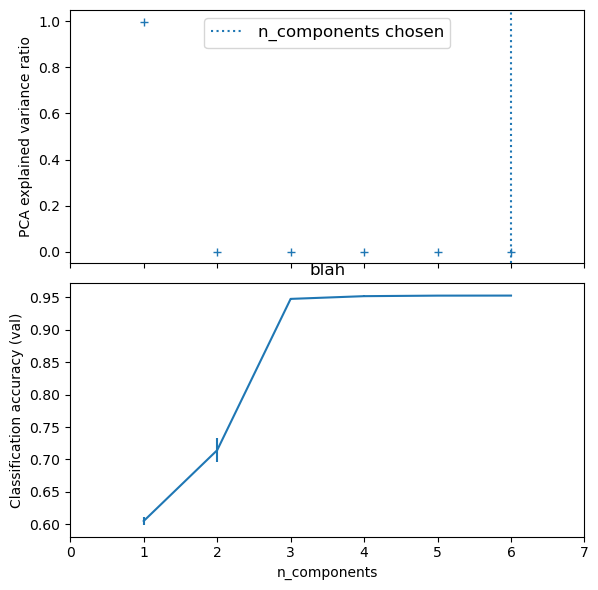

In [20]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

X_digits, y_digits = X_train, y_train
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [1, 2, 3, 4, 5, 6],
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score"))

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(0, 7)

plt.tight_layout()
plt.title('Decision Boundary after PCA')
plt.show()

[0.99783568 0.00152232]
[17374.43680086   678.63079561]


AttributeError: 'DecisionBoundaryDisplay' object has no attribute 'title'

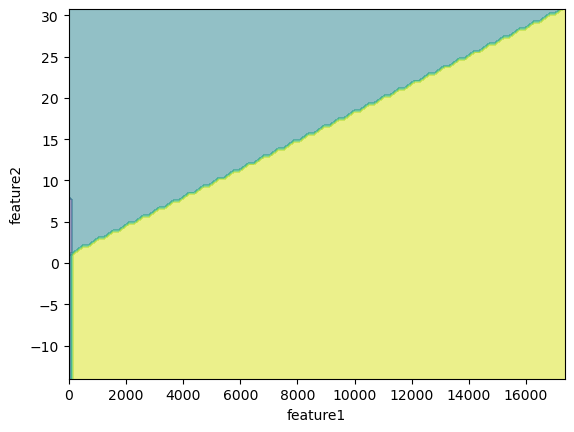

In [21]:
pca = PCA(n_components=2)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
X_new = pca.transform(X_train)

clf221 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='newton-cg', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_new, y_train)
disp = DecisionBoundaryDisplay.from_estimator(clf221, X_new, xlabel = "feature1", ylabel ="feature2", response_method="predict", alpha=0.5)
disp.title("Decision Boundary after application of PCA")


### Part 2: Random Forest

We will repeat the process for random forests; however, rather than manually trying all of the possible combinations of hyperparameters, we will implement a grid search, in which we write code that will have the computer go through all the possibilities and return the best results. 

From outside reading, we know that the two most important hyperparameters for random forests are the number of random features to sample at each split point (max_features) and number of decision trees (n_estimators). So, we will try the options 10, 100, and 500 for n_estimators and 1-6, as well as sqrt and log2, for max_features. 'sqrt'refers to setting the # of features to sqrt(n_features), where n_features is the total number of features being used (6 in our case). 'log2' refers to setting the # of features to log2\*n_features. 

In [6]:
#grid searching key parameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
# define dataset
X, y = X_test, y_test
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 500]
max_features = [1, 2, 3, 'sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

After scanning the space defined above (8 possible values of max_features and 3 possible values of n_estimators, so 24 possibilities), this code has found that the optimal number of random features to sample at each node is 3, and that the optimal number of trees in the forest is 1000. (At least, those are the best values of the options we inputted). 

Next, let us calculate the F1 scores for all options. 

In [ ]:
#variations of 10-tree forests
clfrf7=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf7 = clfrf7.predict(X_test)
f1rf7=sklearn.metrics.f1_score(y_test, y_predrf7, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf7)

clfrf8=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf8 = clfrf8.predict(X_test)
f1rf8=sklearn.metrics.f1_score(y_test, y_predrf8, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf8)

clfrf9=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf9 = clfrf9.predict(X_test)
f1rf9=sklearn.metrics.f1_score(y_test, y_predrf9, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf9)

clfrf10=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf10 = clfrf10.predict(X_test)
f1rf10=sklearn.metrics.f1_score(y_test, y_predrf10, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf10)

clfrf11=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf11 = clfrf11.predict(X_test)
f1rf11=sklearn.metrics.f1_score(y_test, y_predrf11, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf11)

clfrf12=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf12 = clfrf12.predict(X_test)
f1rf12=sklearn.metrics.f1_score(y_test, y_predrf12, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf12)

clfrf12s=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf12s = clfrf12s.predict(X_test)
f1rf12s=sklearn.metrics.f1_score(y_test, y_predrf12s, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf12s)

clfrf12l=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf12l = clfrf12l.predict(X_test)
f1rf12l=sklearn.metrics.f1_score(y_test, y_predrf12l, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf12l)

In [ ]:
#variations of 100-tree forests
clfrf1=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf1 = clfrf1.predict(X_test)
f1rf1=sklearn.metrics.f1_score(y_test, y_predrf1, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf1)

clfrf2=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf2 = clfrf2.predict(X_test)
f1rf2=sklearn.metrics.f1_score(y_test, y_predrf2, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf2)

clfrf3=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf3 = clfrf3.predict(X_test)
f1rf3=sklearn.metrics.f1_score(y_test, y_predrf3, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf3)

clfrf4=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf4 = clfrf4.predict(X_test)
f1rf4=sklearn.metrics.f1_score(y_test, y_predrf4, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf4)

clfrf5=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf5 = clfrf5.predict(X_test)
f1rf5=sklearn.metrics.f1_score(y_test, y_predrf5, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf5)

clfrf6=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf6 = clfrf6.predict(X_test)
f1rf6=sklearn.metrics.f1_score(y_test, y_predrf6, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf6)

clfrf6l=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="sqrt", max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf6l = clfrf6l.predict(X_test)
f1rf6l=sklearn.metrics.f1_score(y_test, y_predrf6l, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf6l)

clfrf6s=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="log2", max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf6s = clfrf6s.predict(X_test)
f1rf6s=sklearn.metrics.f1_score(y_test, y_predrf6s, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf6s)


In [ ]:
#variations of 500-tree forests
clfrf13=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf13 = clfrf13.predict(X_test)
f1rf13=sklearn.metrics.f1_score(y_test, y_predrf13, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf13)

clfrf14=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf14 = clfrf14.predict(X_test)
f1rf14=sklearn.metrics.f1_score(y_test, y_predrf14, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf14)

clfrf15=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf15 = clfrf15.predict(X_test)
f1rf15=sklearn.metrics.f1_score(y_test, y_predrf15, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf15)

clfrf16=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf16 = clfrf16.predict(X_test)
f1rf16=sklearn.metrics.f1_score(y_test, y_predrf16, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf16)

clfrf17=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf17 = clfrf17.predict(X_test)
f1rf17=sklearn.metrics.f1_score(y_test, y_predrf17, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf17)

clfrf18=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf18 = clfrf18.predict(X_test)
f1rf18=sklearn.metrics.f1_score(y_test, y_predrf18, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf18)

clfrf18s=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf18s = clfrf18s.predict(X_test)
f1rf18s=sklearn.metrics.f1_score(y_test, y_predrf18s, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf18s)

clfrf18l=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None).fit(X_train, y_train)
y_predrf18l = clfrf18l.predict(X_test)
f1rf18l=sklearn.metrics.f1_score(y_test, y_predrf18l, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
print(f1rf18l)

### Part 3: Neural Net